# Frameworks para RNAs

Para não precisarmos escrever código para cada rede neural, existem frameworks que abstraem a implementação e focam no uso das redes neurais, são eles: TensorFlow e o Keras.

Antes de vermos na prática o uso deles, vamos visualizar uma rede neural em ação, utilizando o TensorFlow playgroud. Acesse-o em:

[Clique aqui para acessar o TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.93197&showTestData=false&discretize=false&percTrainData=30&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&batchSize_hide=true&discretize_hide=true&regularization_hide=true&regularizationRate_hide=true)

In [45]:
import tensorflow as tf

print(tf.__version__)

2.19.0


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()


iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [47]:
print("\nDistribuição das classes:")
iris_df['target'].value_counts()


Distribuição das classes:


target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [48]:
X = iris.data
y = iris.target

In [49]:
y[:5]

array([0, 0, 0, 0, 0])

In [50]:
from tensorflow.keras.utils import to_categorical
y_one_hot = to_categorical(y, num_classes=3)
print("\nClasses one-hot:")
print(y_one_hot[:5])



Classes one-hot:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nDados escalados:")
print(X_scaled[:5])


Dados escalados:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42, stratify=y_one_hot)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (120, 4), y_train: (120, 3)
X_test: (30, 4), y_test: (30, 3)


In [61]:
from tensorflow import keras
from tensorflow.keras import layers 
model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(4,)),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

/home/dede/DataAnalisys/JupyterVenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)              

In [63]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=True
)

Epoch 1/1000


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.3086 - loss: 1.3672 - val_accuracy: 0.4167 - val_loss: 1.2045
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3086 - loss: 1.2864 - val_accuracy: 0.4167 - val_loss: 1.1590
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2891 - loss: 1.2563 - val_accuracy: 0.4167 - val_loss: 1.1235
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2734 - loss: 1.2005 - val_accuracy: 0.4167 - val_loss: 1.0978
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3242 - loss: 1.1344 - val_accuracy: 0.5000 - val_loss: 1.0784
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4180 - loss: 1.0891 - val_accuracy: 0.6667 - val_loss: 1.0648
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5521 - loss: 1.0569 - val_accuracy: 0.4583 - val_loss: 1.0577
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4440 - loss: 1.0599 - val_accuracy: 0.6250 - val_loss: 1.0

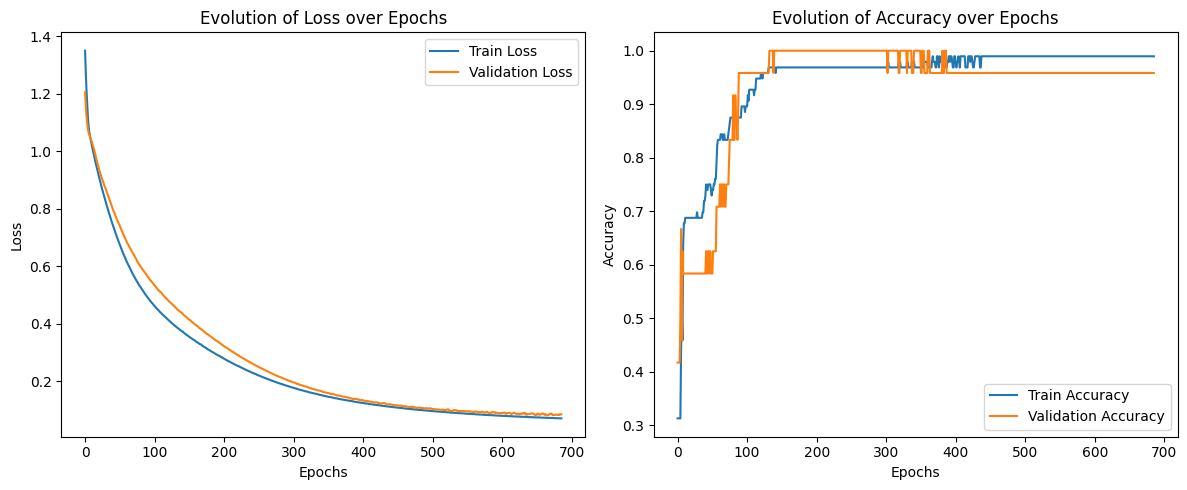

In [64]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolution of Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Evolution of Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy on test data: 1.0000 (30/30)


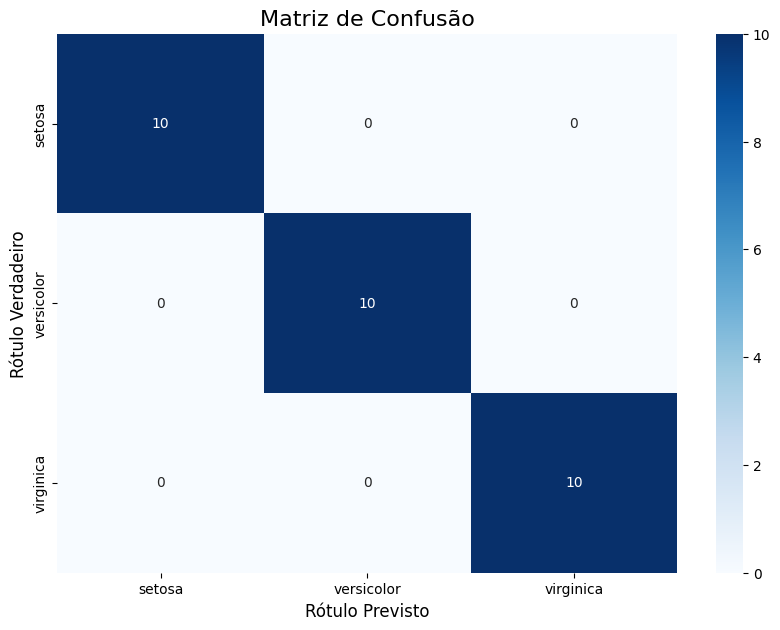

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification metrics

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names)
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Rótulo Previsto', fontsize=12)
plt.ylabel('Rótulo Verdadeiro', fontsize=12)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, 
                           target_names=iris.target_names))

# Calculate and display accuracy
accuracy = np.sum(y_pred_classes == y_true_classes) / len(y_true_classes)
print(f"\nAccuracy on test data: {accuracy:.4f} ({np.sum(y_pred_classes == y_true_classes)}/{len(y_true_classes)})")

plt.show()

# Rede neural para regressão

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

TensorFlow: 2.18.0
Keras: 3.8.0


MedInc: Renda média dos moradores

HouseAge: Idade média das casas

AveRooms: Média de cômodos por residência

AveBedrms: Média de quartos por residência

Population: População do bairro

AveOccup: Média de moradores por casa

Latitude: Coordenada geográfica

Longitude: Coordenada geográfica

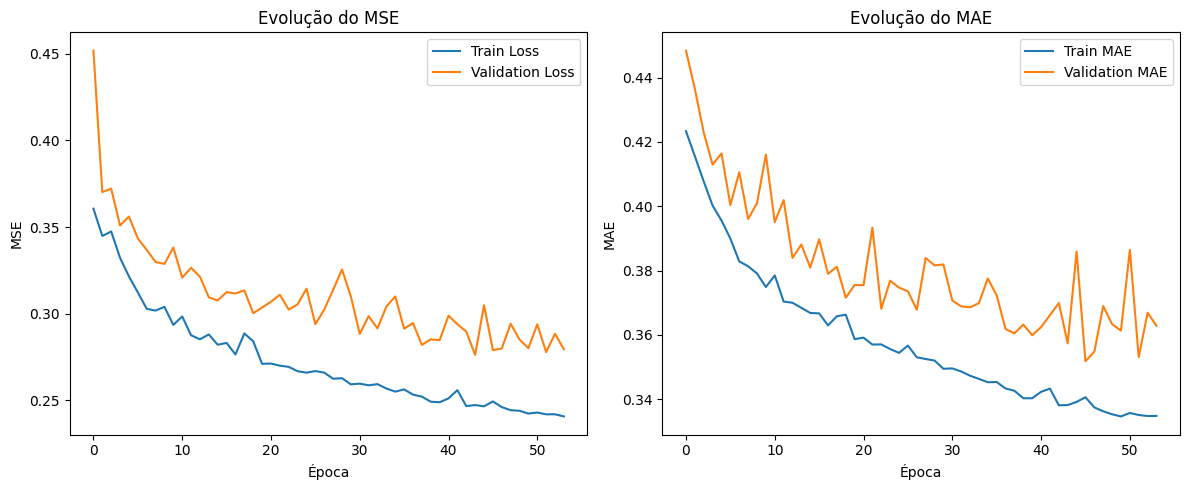

In [ ]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolução do MSE')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Evolução do MAE')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 Métricas de Desempenho:
MSE: 0.2684
MAE: 0.3519 (≈ $35194.63 em erro médio)
R²: 0.7952


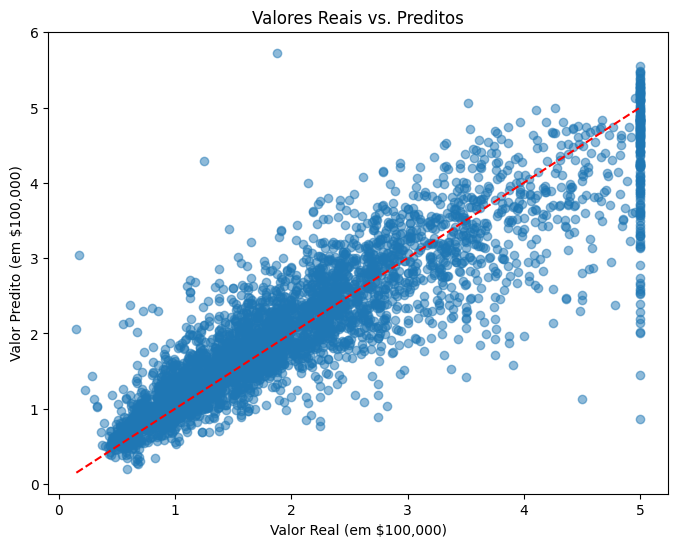

In [ ]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Métricas de Desempenho:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f} (≈ ${mae*100000:.2f} em erro médio)")
print(f"R²: {r2:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Valores Reais vs. Preditos')
plt.xlabel('Valor Real (em $100,000)')
plt.ylabel('Valor Predito (em $100,000)')
plt.show()